We adapted our code from the following: https://www.tensorflow.org/tutorials/generative/pix2pix

In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
physical_devices
tf.config.set_visible_devices(physical_devices[2],'GPU')

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

import numpy as np
import os
import time

from matplotlib import pyplot as plt
from IPython import display

from PIL import Image
import nibabel as nib
import glob
from skimage.transform import resize as rsz
import imageio

In [10]:
#nifti to images for training
# preprocessing

for kind in ['Train','Val']:
    train_data_path=f'{kind}_Dataset'
    patients = os.listdir(train_data_path)
#     print(patients)

    for patient in patients:
        print(f'WORKING ON PATIENTS: {patient}')
        
        study_type = os.listdir(os.path.join(train_data_path,patient))
        patient_path = os.path.join(train_data_path,patient,study_type[0])
        scans =os.listdir(os.path.join(train_data_path,patient))

        ## Create the folders to store pngs 
        png_path= f'{kind.lower()}_FLAIR_2_T2_pngs'
#         os.mkdir(png_dir)

        ## Create the numpy arrays to pngs 
        for scan in scans:
            if 't2.nii.gz' in scan:
                t2path=os.path.join(patient_path,scan)
#                 print(t2path)

                t2_img = nib.load(t2path)
                t2_imgdata = t2_img.get_fdata()
                t2_imgdata = t2_imgdata.astype(np.float)
                t2_affine = t2_img.affine

                resized_t2_imgdata = rsz(t2_imgdata, (256, 256), order = 1, preserve_range=True)

                resized_t2_imgdata -= resized_t2_imgdata.min()
                resized_t2_imgdata *= 1./np.max(resized_t2_imgdata)
                resized_t2_imgdata *= 255
                resized_t2_imgdata = np.flipud(resized_t2_imgdata)


            if 'flair.nii.gz' in scan:
                flairpath=os.path.join(patient_path,scan)
#                 print(flairpath)

                flair_img = nib.load(flairpath)
                flair_imgdata = flair_img.get_fdata()
                flair_imgdata = flair_imgdata.astype(np.float)
#                 print(flair_imgdata.shape)

                resized_flair_imgdata = rsz(flair_imgdata, (256, 256), order = 1, preserve_range=True)

                resized_flair_imgdata -= resized_flair_imgdata.min()
                resized_flair_imgdata *= 1./np.max(resized_flair_imgdata)
                resized_flair_imgdata *= 255
                resized_flair_imgdata = np.flipud(resized_flair_imgdata)
#                 print(resized_flair_imgdata.shape)
#                 print(resized_flair_imgdata.min(),resized_flair_imgdata.max())

        ## Use the numpy arrays to pngs              
        for i in range(0,flair_imgdata.shape[2]):
            slice_t2 = resized_t2_imgdata[:,:,i]
            slice_flair = resized_flair_imgdata[:,:,i]
            #remove zeroes slices
            if (slice_t2==0).all() and (slice_flair==0).all():
              continue

            slice_t2 = np.rot90(slice_t2,1)
            slice_flair = np.rot90(slice_flair,1)

            fusion = np.hstack((slice_t2,slice_flair)).astype('uint8')
            fn =patient+'_slice'+ str(i).zfill(3) + '.png'
            outdir = png_path
            outname = os.path.join(outdir, fn)

            imageio.imwrite(outname, fusion, compress_level=0)

WORKING ON PATIENTS: 0001_KAHLON_YARON
WORKING ON PATIENTS: 0002_SIGAL_JENIA
WORKING ON PATIENTS: 0004_ABOUD_RAMI
WORKING ON PATIENTS: 0008_ASSAF_OMER
WORKING ON PATIENTS: 0009_BACHAR_ONN
WORKING ON PATIENTS: 0010_BACHBUCH_LINDA
WORKING ON PATIENTS: 0011_BEIDAS_HANNA
WORKING ON PATIENTS: 0012_BEIMAN_MAIA
WORKING ON PATIENTS: 0013_BRAMI_AHARON
WORKING ON PATIENTS: 0015_DAVID_GEVA
WORKING ON PATIENTS: 0017_DZORELASHVILI_HAIM_SIMON
WORKING ON PATIENTS: 0018_ELGARISI_MAOR_SHLOMO
WORKING ON PATIENTS: 0020_GAZALIN_AHMAD
WORKING ON PATIENTS: 0021_GOLDSTEEN_SHLOMI
WORKING ON PATIENTS: 0022_HAJAJ_AMI_GIL
WORKING ON PATIENTS: 0024_KEREN_RONIT
WORKING ON PATIENTS: 0025_KERZMAN_SOFER_KEREN
WORKING ON PATIENTS: 0026_KNOP_DORIV
WORKING ON PATIENTS: 0028_LIN_DROR_ABBA
WORKING ON PATIENTS: 0030_MAVASHEV_SULIMAN
WORKING ON PATIENTS: 0032_MIMON_NERIA
WORKING ON PATIENTS: 0033_MINZ_HANOCH
WORKING ON PATIENTS: 0034_MORE_ANAT
WORKING ON PATIENTS: 0035_NOSRATI_BAR_SAHAR
WORKING ON PATIENTS: 0036_OCHERETIANS

WORKING ON PATIENTS: 0342_HABER_YEHUDA
WORKING ON PATIENTS: 0343_HAIM_ASAF_YOSEF
WORKING ON PATIENTS: 0344_HAZIZA_YACOV
WORKING ON PATIENTS: 0345_ISRAEL_AYELET
WORKING ON PATIENTS: 0346_ITSHAK_SHELEG_ILANIT
WORKING ON PATIENTS: 0348_MARSIANO_SIVAN_SARA_MAI
WORKING ON PATIENTS: 0349_MERZBACH_ORLI
WORKING ON PATIENTS: 0350_MIZRAHI_NADIA
WORKING ON PATIENTS: 0351_MOSHE_YAFA
WORKING ON PATIENTS: 0352_MOTAI_REUVEN
WORKING ON PATIENTS: 0353_MOYAL_CHEN
WORKING ON PATIENTS: 0354_MUVDI_NAOR
WORKING ON PATIENTS: 0355_PAYEVSKY_SAGI
WORKING ON PATIENTS: 0356_PAZ_YARIV
WORKING ON PATIENTS: 0367_SHTOIK_TATIANA
WORKING ON PATIENTS: 0368_TAUMAN_HANA
WORKING ON PATIENTS: 0369_TETUANI_HAIM
WORKING ON PATIENTS: 0053_SHAMIR_YEFET
WORKING ON PATIENTS: 0055_SHAPIRA_KARIN
WORKING ON PATIENTS: 0056_SHEFER-NAIMAN_SHIRLEY
WORKING ON PATIENTS: 0059_STOYANOV_MIRA
WORKING ON PATIENTS: 0060_TAMIR_HADAR
WORKING ON PATIENTS: 0062_TREISTER_NETA
WORKING ON PATIENTS: 0064_YERUSHALMI_COHEN_RONIT
WORKING ON PATIENTS: 0065

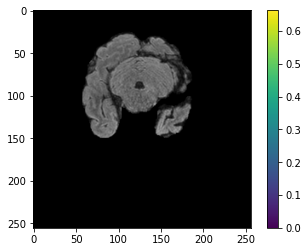

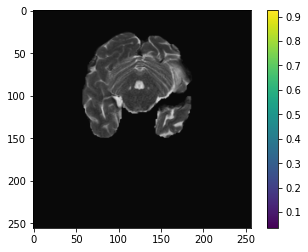

In [3]:
# Cell 2

PATH = #BLINDED

BUFFER_SIZE = 400
BATCH_SIZE = 1
IMG_WIDTH = 256
IMG_HEIGHT = 256

# Load image as tensor and separate input and target(real_image)

def load(image_file):
    image = tf.io.read_file(image_file)
    image = tf.image.decode_png(image, channels=3)

    w = tf.shape(image)[1]

    w = w // 2
    input_image = image[:, :w, :]
    real_image = image[:, w:, :]

    input_image = tf.cast(input_image, tf.float32)
    real_image = tf.cast(real_image, tf.float32)

    return input_image, real_image

# Load and show a sample input(inp) and real/target(re)
# inp and re will be used later on for further visualization

inp, re = load(PATH+'/train_FLAIR_2_T2_pngs/100.png')


# casting to int for matplotlib to show the image

plt.figure()
plt.imshow(inp/255.0)
plt.colorbar()
plt.figure()
plt.imshow(re/255.0)
plt.colorbar()

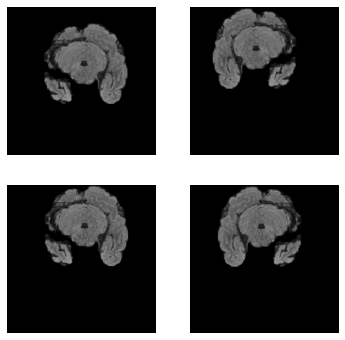

In [4]:
# Cell 3

def resize(input_image, real_image, height, width):
    input_image = tf.image.resize(input_image, [height, width],
                                method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    real_image = tf.image.resize(real_image, [height, width],
                               method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

    return input_image, real_image

def random_crop(input_image, real_image):
    stacked_image = tf.stack([input_image, real_image], axis=0)
    cropped_image = tf.image.random_crop(
      stacked_image, size=[2, IMG_HEIGHT, IMG_WIDTH, 3])

    return cropped_image[0], cropped_image[1]

# normalizing the images to [-1, 1]
def normalize(input_image, real_image):
    input_image = (input_image / 127.5) - 1
    real_image = (real_image / 127.5) - 1

    return input_image, real_image

@tf.function()
def random_jitter(input_image, real_image):
    # resizing to 286 x 286 x 3
    input_image, real_image = resize(input_image, real_image, 286, 286)

    # randomly cropping to 256 x 256 x 3
    input_image, real_image = random_crop(input_image, real_image)

    if tf.random.uniform(()) > 0.5:
    # random mirroring
        input_image = tf.image.flip_left_right(input_image)
        real_image = tf.image.flip_left_right(real_image)

    return input_image, real_image

# Load image and augment

def load_image_train(image_file):
    input_image, real_image = load(image_file)
    input_image, real_image = random_jitter(input_image, real_image)
    input_image, real_image = normalize(input_image, real_image)

    return input_image, real_image

def load_image_test(image_file):
    input_image, real_image = load(image_file)
    input_image, real_image = resize(input_image, real_image,
                                   IMG_HEIGHT, IMG_WIDTH)
    input_image, real_image = normalize(input_image, real_image)

    return input_image, real_image

# Show example of random jittering

plt.figure(figsize=(6, 6))
for i in range(4):
    rj_inp, rj_re = random_jitter(inp, re)
    plt.subplot(2, 2, i+1)
    plt.imshow(rj_inp/255.0)
    plt.axis('off')
plt.show()

In [5]:
# Cell 4

# Train
train_dataset = tf.data.Dataset.list_files(PATH+'/train_FLAIR_2_T2_pngs/*.png')
train_dataset = train_dataset.map(load_image_train,
                                  num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.batch(BATCH_SIZE)

# Test
test_dataset = tf.data.Dataset.list_files(PATH+'/val_FLAIR_2_T2_pngs/*.png')
test_dataset = test_dataset.map(load_image_test)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [6]:
# Cell 5
# downsample and upsample functions

OUTPUT_CHANNELS = 3

def downsample(filters, size, apply_batchnorm=True):
    initializer = tf.random_normal_initializer(0., 0.02)

    result = tf.keras.Sequential()
    result.add(
      tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                             kernel_initializer=initializer, use_bias=False))

    if apply_batchnorm:
        result.add(tf.keras.layers.BatchNormalization())

    result.add(tf.keras.layers.LeakyReLU())

    return result

# downsample result
down_model = downsample(3, 4)
down_result = down_model(tf.expand_dims(inp, 0))
#print (f'Downsample result: {down_result.shape}')

def upsample(filters, size, apply_dropout=False):
    initializer = tf.random_normal_initializer(0., 0.02)

    result = tf.keras.Sequential()
    result.add(
        tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                    padding='same',
                                    kernel_initializer=initializer,
                                    use_bias=False))

    result.add(tf.keras.layers.BatchNormalization())

    if apply_dropout:
        result.add(tf.keras.layers.Dropout(0.5))

    result.add(tf.keras.layers.ReLU())

    return result

# upsample result
up_model = upsample(3, 4)
up_result = up_model(down_result)
#print (f'Upsample result: {up_result.shape}')

In [7]:
# Cell 6

def Generator():
    inputs = tf.keras.layers.Input(shape=[256,256,3])

    down_stack = [
    downsample(64, 4, apply_batchnorm=False), # (bs, 128, 128, 64)
    downsample(128, 4), # (bs, 64, 64, 128)
    downsample(256, 4), # (bs, 32, 32, 256)
    downsample(512, 4), # (bs, 16, 16, 512)
    downsample(512, 4), # (bs, 8, 8, 512)
    downsample(512, 4), # (bs, 4, 4, 512)
    downsample(512, 4), # (bs, 2, 2, 512)
    downsample(512, 4), # (bs, 1, 1, 512)
    ]

    up_stack = [
    upsample(512, 4, apply_dropout=True), # (bs, 2, 2, 1024)
    upsample(512, 4, apply_dropout=True), # (bs, 4, 4, 1024)
    upsample(512, 4, apply_dropout=True), # (bs, 8, 8, 1024)
    upsample(512, 4), # (bs, 16, 16, 1024)
    upsample(256, 4), # (bs, 32, 32, 512)
    upsample(128, 4), # (bs, 64, 64, 256)
    upsample(64, 4), # (bs, 128, 128, 128)
    ]

    initializer = tf.random_normal_initializer(0., 0.02)
    last = tf.keras.layers.Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                         strides=2,
                                         padding='same',
                                         kernel_initializer=initializer,
                                         activation='tanh') # (bs, 256, 256, 3)

    x = inputs

    # Downsampling through the model
    skips = []
    for down in down_stack:
        x = down(x)
        skips.append(x)

    skips = reversed(skips[:-1])

    # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = tf.keras.layers.Concatenate()([x, skip])

    x = last(x)

    return tf.keras.Model(inputs=inputs, outputs=x)

# create generator and show architecture
generator = Generator()
tf.keras.utils.plot_model(generator, show_shapes=True, dpi=64)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [8]:
# Cell 7

LAMBDA = 100

def generator_loss(disc_generated_output, gen_output, target):
    gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)

    # mean absolute error
    l1_loss = tf.reduce_mean(tf.abs(target - gen_output))

    total_gen_loss = gan_loss + (LAMBDA * l1_loss)

    return total_gen_loss, gan_loss, l1_loss

In [9]:
# Cell 8

def Discriminator():
    initializer = tf.random_normal_initializer(0., 0.02)

    inp = tf.keras.layers.Input(shape=[256, 256, 3], name='input_image')
    tar = tf.keras.layers.Input(shape=[256, 256, 3], name='target_image')

    x = tf.keras.layers.concatenate([inp, tar]) # (bs, 256, 256, channels*2)

    down1 = downsample(64, 4, False)(x) # (bs, 128, 128, 64)
    down2 = downsample(128, 4)(down1) # (bs, 64, 64, 128)
    down3 = downsample(256, 4)(down2) # (bs, 32, 32, 256)

    zero_pad1 = tf.keras.layers.ZeroPadding2D()(down3) # (bs, 34, 34, 256)
    conv = tf.keras.layers.Conv2D(512, 4, strides=1,
                                kernel_initializer=initializer,
                                use_bias=False)(zero_pad1) # (bs, 31, 31, 512)

    batchnorm1 = tf.keras.layers.BatchNormalization()(conv)

    leaky_relu = tf.keras.layers.LeakyReLU()(batchnorm1)

    zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu) # (bs, 33, 33, 512)

    last = tf.keras.layers.Conv2D(1, 4, strides=1,
                                kernel_initializer=initializer)(zero_pad2) # (bs, 30, 30, 1)

    return tf.keras.Model(inputs=[inp, tar], outputs=last)

# create discriminator and show architecture
discriminator = Discriminator()
tf.keras.utils.plot_model(discriminator, show_shapes=True, dpi=64)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [10]:
# Cell 9
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(disc_real_output, disc_generated_output):
    real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)

    generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)

    total_disc_loss = real_loss + generated_loss

    return total_disc_loss

In [11]:
# Cell 10
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

(256, 256, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'>
-0.9937862
0.003106892
<class 'numpy.ndarray'>
uint8
(256, 256, 3)


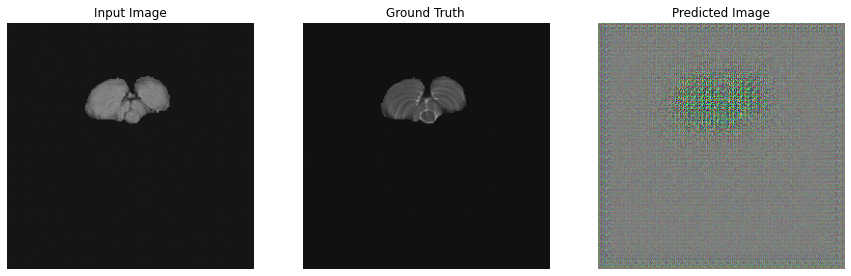

Mean Squared Error: 0.6954419612884521


In [12]:
# Cell 11

def generate_images(model, test_input, tar):
    prediction = model(test_input, training=True)
    plt.figure(figsize=(15,15))

    display_list = [test_input[0], tar[0], prediction[0]]
    title = ['Input Image', 'Ground Truth', 'Predicted Image']
    print(display_list[0].shape)
    print(type(display_list[0]))

    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.title(title[i])
        # getting the pixel values between [0, 1] to plot it.
        plt.imshow(display_list[i] * 0.5 + 0.5)
        plt.axis('off')


    display_list[i] = display_list[i].numpy()

    display_list[i] = np.array(display_list[i])

    print(display_list[i].min())

    display_list[i] = display_list[i] * 0.5 + 0.5

    print(display_list[i].min())

    display_list[i] *= 255.0

    display_list[i] = display_list[i].clip(0.0, 255.0).astype(np.uint8)

    print(type(display_list[i]))
    print(display_list[i].dtype)
    print(display_list[i].shape)


    image = Image.fromarray(display_list[i])
    image.save('example_output.png', format='PNG')
    plt.show()

    mse = (np.square(tar - prediction)).mean()
    print (f'Mean Squared Error: {mse}')

for example_input, example_target in test_dataset.take(1):
    generate_images(generator, example_input, example_target)

In [13]:
# Cell 12

import datetime
log_dir="logs/"

summary_writer = tf.summary.create_file_writer(
  log_dir + "fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

@tf.function
def train_step(input_image, target, epoch):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        gen_output = generator(input_image, training=True)

        disc_real_output = discriminator([input_image, target], training=True)
        disc_generated_output = discriminator([input_image, gen_output], training=True)

        gen_total_loss, gen_gan_loss, gen_l1_loss = generator_loss(disc_generated_output, gen_output, target)
        disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

    generator_gradients = gen_tape.gradient(gen_total_loss,
                                          generator.trainable_variables)
    discriminator_gradients = disc_tape.gradient(disc_loss,
                                               discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(generator_gradients,
                                          generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(discriminator_gradients,
                                              discriminator.trainable_variables))

    with summary_writer.as_default():
        tf.summary.scalar('gen_total_loss', gen_total_loss, step=epoch)
        tf.summary.scalar('gen_gan_loss', gen_gan_loss, step=epoch)
        tf.summary.scalar('gen_l1_loss', gen_l1_loss, step=epoch)
        tf.summary.scalar('disc_loss', disc_loss, step=epoch)

# Training Loop
#   - Iterates over the number of epochs.
#   - On each epoch it clears the display, and runs `generate_images` to show it's progress.
#   - On each epoch it iterates over the training dataset, printing a '.' for each example.
#   - It saves a checkpoint every 20 epochs.

def fit(train_ds, epochs, test_ds):
    for epoch in range(epochs):
        start = time.time()

        display.clear_output(wait=True)

        for example_input, example_target in test_ds.take(1):
            generate_images(generator, example_input, example_target)
        print("Epoch: ", epoch)

        # Train
        for n, (input_image, target) in train_ds.enumerate():
            print('.', end='')
            if (n+1) % 100 == 0:
                print()
            train_step(input_image, target, epoch)
        print()

        # saving (checkpoint) the model every 20 epochs
        if (epoch + 1) % 20 == 0:
            checkpoint.save(file_prefix = checkpoint_prefix)

        print ('Time taken for epoch {} is {} sec\n'.format(epoch + 1,
                                                            time.time()-start))
    checkpoint.save(file_prefix = checkpoint_prefix)

# TRAINING

====================================================================================================================

====================================================================================================================

(256, 256, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'>
-0.9570163
0.021491855
<class 'numpy.ndarray'>
uint8
(256, 256, 3)


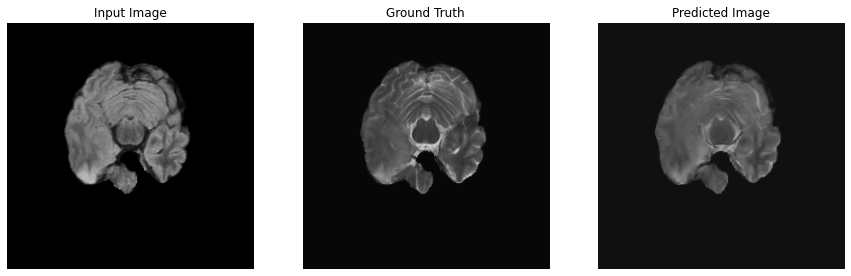

Mean Squared Error: 0.011168059892952442
Epoch:  30
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
.......................................

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
...........................................................................................

In [ ]:
# Cell 13
EPOCHS = 300
# EPOCHS = 3

fit(train_dataset, EPOCHS, test_dataset)

====================================================================================================================

====================================================================================================================

====================================================================================================================

# Obtain nifti volumes from nifti inputs of the test set

In [17]:
from __future__ import print_function

import nibabel as nib
from skimage.transform import resize as rsz
import imageio
from sklearn.metrics import mean_squared_error
from skimage.metrics import structural_similarity as ssim
import pandas as pd

In [17]:
# test_data_path = 'Inference'
test_data_path =  r'Test_Dataset'  


image_rows = 256
image_cols = 256

In [15]:
patients = os.listdir(test_data_path)
print(patients)

['0370_YAAKOBOV_LEA', '0325_ZUKERMAN_IGOR']


In [16]:
def generate_nifti_mse(model, test_input, tar, image_rows, image_cols):
    prediction = model(test_input, training=True)
    plt.figure(figsize=(15,15))

    display_list = [test_input[0], tar[0], prediction[0]]
    title = ['Input Image', 'Ground Truth', 'Predicted Image']

    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.title(title[i])
        # getting the pixel values between [0, 1] to plot it.
        plt.imshow(display_list[i] * 0.5 + 0.5)
        plt.axis('off')

    display_list[2] = display_list[2].numpy()
    display_list[2] = np.array(display_list[2])
    
    display_list[2] = rsz(display_list[2], (image_rows, image_cols), order = 1, preserve_range=True)

    display_list[2] = display_list[2] * 0.5 + 0.5
    display_list[2] *= 255.0
    display_list[2] = display_list[2].clip(0.0, 255.0).astype(np.uint8)

    print(type(display_list[2]))

    gan_slice = display_list[2]
    gan_t2[:,:,z,:]=gan_slice
    
    plt.show()
    
    ## Generate arrays to measure MSE and SSI
    
    target_array = np.array(tar[0,:,:,0].numpy())
    prediction_array = np.array(prediction[0,:,:,0].numpy())

    mse_sklearn = mean_squared_error(target_array,prediction_array)
    if mse_sklearn == 0:
        psnr=100
    else:
        maxi = 255.0
        psnr = 10*np.log10(maxi/ np.sqrt(mse_sklearn))
    ssi = ssim(target_array,prediction_array)
    metrics.append([patient,z,mse_sklearn,psnr,ssi])
    
    print (f'Sklearn MSE: {mse_sklearn}')
    print (f'PSNR: {psnr}db')
    print (f'SSI: {ssi}')

### Load checkpoints

In [18]:
!ls {checkpoint_dir}

checkpoint		     ckpt-2.data-00000-of-00001
ckpt-10.data-00000-of-00001  ckpt-2.index
ckpt-10.index		     ckpt-3.data-00000-of-00001
ckpt-11.data-00000-of-00001  ckpt-3.index
ckpt-11.index		     ckpt-4.data-00000-of-00001
ckpt-12.data-00000-of-00001  ckpt-4.index
ckpt-12.index		     ckpt-5.data-00000-of-00001
ckpt-13.data-00000-of-00001  ckpt-5.index
ckpt-13.index		     ckpt-6.data-00000-of-00001
ckpt-14.data-00000-of-00001  ckpt-6.index
ckpt-14.index		     ckpt-7.data-00000-of-00001
ckpt-15.data-00000-of-00001  ckpt-7.index
ckpt-15.index		     ckpt-8.data-00000-of-00001
ckpt-16.data-00000-of-00001  ckpt-8.index
ckpt-16.index		     ckpt-9.data-00000-of-00001
ckpt-1.data-00000-of-00001   ckpt-9.index
ckpt-1.index


In [19]:
checkpoint_dir

'./training_checkpoints'

In [20]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [25]:
for patient in patients:
    print(f'WORKING ON PATIENTS: {patient}')

    patient_path = os.path.join(test_data_path,patient)
#     studio = os.listdir(patient_path)
#     scans =os.listdir(os.path.join(patient_path,studio[0]))
    
    ## Create the folders to store pngs and nifti
    PNGs_dir = f'pngs_t2_{name}'
    NIFTI_dir = f'nifti_t2_{name}'
    png_dir = os.path.join(patient_path, PNGs_dir)
    nifti_dir = os.path.join(patient_path, NIFTI_dir)
#     os.mkdir(png_dir)
#     os.mkdir(nifti_dir)
    png_path= png_dir
    nifti_path = nifti_dir
    
    scans =os.listdir(patient_path)
    
    print(scans)
        
    # Create the numpy arrays to generate pngs 
    for scan in scans:
        if 't2.nii.gz' in scan:
            t2path = os.path.join(patient_path,scan)
            print(t2path)

            t2_img = nib.load(t2path)
            t2_imgdata = t2_img.get_fdata()
            t2_imgdata = t2_imgdata.astype(np.float32)
            t2_affine = t2_img.affine

            resized_t2_imgdata = rsz(t2_imgdata, (256, 256), order = 1, preserve_range=True)
            
            resized_t2_imgdata -= resized_t2_imgdata.min()
            resized_t2_imgdata *= 1./np.max(resized_t2_imgdata)
            resized_t2_imgdata *= 255
            resized_t2_imgdata = np.flipud(resized_t2_imgdata)


        if 'flair.nii.gz' in scan:
            flairpath = os.path.join(patient_path,scan)
            print(flairpath)

            flair_img = nib.load(flairpath)
            flair_imgdata = flair_img.get_fdata()
            flair_imgdata = flair_imgdata.astype(np.float32)
            # the FLAIR affine will be used to build the nifti from gan's output
            flair_affine = flair_img.affine

            resized_flair_imgdata = rsz(flair_imgdata, (256, 256), order = 1, preserve_range=True)

            resized_flair_imgdata -= resized_flair_imgdata.min()
            resized_flair_imgdata *= 1./np.max(resized_flair_imgdata)
            resized_flair_imgdata *= 255
            resized_flair_imgdata = np.flipud(resized_flair_imgdata)
            
    ## use the numpy arrays to generate pngs              
    for i in range(0,resized_flair_imgdata.shape[2]):
        slice_t2 = resized_t2_imgdata[:,:,i]
        slice_flair = resized_flair_imgdata[:,:,i]

        slice_t2 = np.rot90(slice_t2,1)
        slice_flair = np.rot90(slice_flair,1)

        ## generates the input for pix2pix stack: INPUT -> TARGET
        fusion = np.hstack((slice_flair,slice_t2)).astype('uint8')
        fn = str(i).zfill(3) + '.png'
        outdir = png_path
        outname = os.path.join(outdir, fn)
        imageio.imwrite(outname, fusion, compress_level=0)
        
    gan_t2 = np.ndarray((flair_imgdata.shape[1],flair_imgdata.shape[0],flair_imgdata.shape[2],3)) # the last axis is 3 because it's rgb, but we need only one

    # Predictions input
    test_prediction = tf.data.Dataset.list_files(outdir+'/*.png', shuffle=False)
    test_prediction = test_prediction.map(load_image_test)
    test_prediction = test_prediction.batch(BATCH_SIZE)

    ## Run the trained pix2pix model on the patient
    z = 0
    print('Generating the metrics list')
    metrics = []
    for inp, tar in test_prediction.take(-1):
        generate_nifti_mse(generator, inp, tar, flair_imgdata.shape[1], flair_imgdata.shape[0]) 
        print(f'Slice number: {z}')
        z +=1
        
    # Generate the nifti file from the output of pix2pix

    
    nifti_img=np.copy(gan_t2[:,:,:,0])
    nifti_img = np.flipud(nifti_img)
    nifti_img = nifti_img.astype(np.float32)
    gan_flair_nifti = nib.Nifti1Image(np.flipud(np.rot90(np.fliplr(nifti_img),1)), affine=flair_img.affine)
#     nib.save(gan_flair_nifti, nifti_dir+'/gt2.nii.gz')
    
    # Generate dataframe with evaluation metrics for each patient and slice
    df = pd.DataFrame(metrics, columns=["PID","Slice","MSE","PSNR","SSI"])
    df.to_csv(f'BLINDED_flair2t2.csv', mode='a',header=False)
    
    print('==================================================================================================')

WORKING ON PATIENTS: 0370_YAAKOBOV_LEA
['Thumbs.db']


NameError: name 'resized_flair_imgdata' is not defined